# Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set()

## Importing data using Pandas

In [2]:
# Raw data
df_deli_raw = pd.read_csv('Data/1.Data Exploration/delivery.csv', index_col='timestamp')
df_cons_raw = pd.read_csv('Data/1.Data Exploration/consumption.csv', index_col='timestamp')

df_deli_raw.index = pd.to_datetime(df_deli_raw.index)
df_cons_raw.index = pd.to_datetime(df_cons_raw.index)

# Cleaned data
df_deli = pd.read_csv('Data/2.Data Cleaning/delivery.csv', index_col='timestamp')
df_cons = pd.read_csv('Data/2.Data Cleaning/consumption.csv', index_col='timestamp')
df_info = pd.read_csv('Data/2.Data Cleaning/houses_info.csv', index_col='ID-nummer')

df_deli.index = pd.to_datetime(df_deli.index)
df_cons.index = pd.to_datetime(df_cons.index)

# Full dataset
df_full = pd.read_csv('Data/3.Data Preparation/df_full_daily.csv')
df_full.drop(df_full.columns[0], axis=1, inplace=True)

# Weather data
df_weather = pd.read_csv('Data/3.Data Preparation/weather.csv', index_col='Date_and_time')
df_weather.index = pd.to_datetime(df_weather.index)

# Filling NaN values
df_weather.loc[(df_weather['N'] == '     '), 'N'] = np.nan
df_weather = df_weather.fillna(method='ffill', axis=1)
df_weather = df_weather.apply(pd.to_numeric)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Data Visualization

This notebook will show the whole data preprocessing process by using plots. It will contain the following sections:
* Visualization of the energy delivery and consumption raw data.
* Visualization of the energy delivery and consumption cleaned data.
* Visualization of the energy delivery and consumption cleaned data by hour, day and week.
* Visualization of the weather data from the _KNMI_.

In some of the sections we will be showing the data just from the first house

### RAW Data
The first section contains the visualization of the raw data as received from the smart meter.

In [3]:
df_house_1 = pd.DataFrame(columns=['deli', 'cons'], index=df_deli_raw.index)
df_house_1['deli'] = df_deli_raw['H01']
df_house_1['cons'] = df_cons_raw['H01']

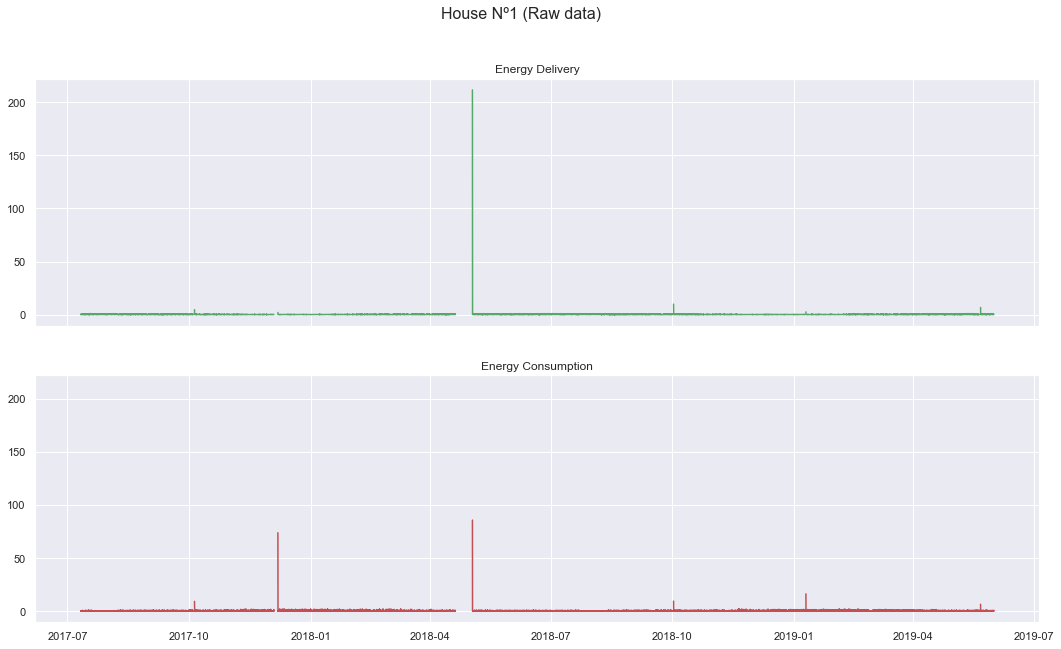

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(18,10))
axs[0].plot(df_house_1['deli'], color='g')
axs[1].plot(df_house_1['cons'], color='r')

axs[0].set_title("Energy Delivery")
axs[1].set_title("Energy Consumption")

fig.suptitle('House Nº1 (Raw data)', fontsize=16)

plt.show()

From these graphs, we just can extract that there are outliers in our dataset that have to be cleaned before inserting them in the models.

### Cleaned Data

#### 15min interval

In [5]:
df_house_1 = pd.DataFrame(columns=['timestamp', 'deli', 'cons'], index=df_deli.index)
df_house_1['timestamp'] = df_deli.index
df_house_1['deli'] = df_deli['H01']
df_house_1['cons'] = df_cons['H01']

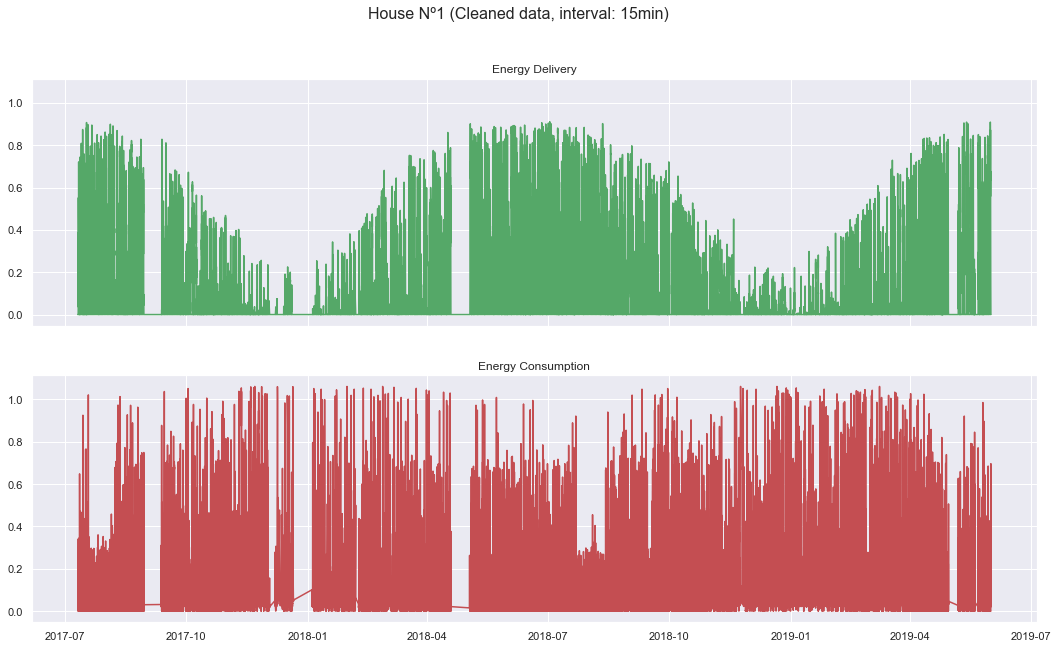

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(18,10))
axs[0].plot(df_house_1['deli'], color='g')
axs[1].plot(df_house_1['cons'], color='r')

axs[0].set_title("Energy Delivery")
axs[1].set_title("Energy Consumption")

fig.suptitle('House Nº1 (Cleaned data, interval: 15min)', fontsize=16)

plt.show()

Once we have cleaned the dataset, we can get more information from these graphs:
* We can clearly see that the amount of energy delivery is higher during the summer months
* The energy consumption keeps constant during the whole year.

#### 1 day interval

In [9]:
df_house_1_day = df_house_1.groupby([df_house_1.index.year, df_house_1.index.month,
                                 df_house_1.index.week, df_house_1.index.day]).agg({
    'deli':'sum', 'cons':'sum', 'timestamp': lambda x: x[int(len(x)/2)]
})

df_house_1_day = df_house_1_day.set_index('timestamp').sort_index()

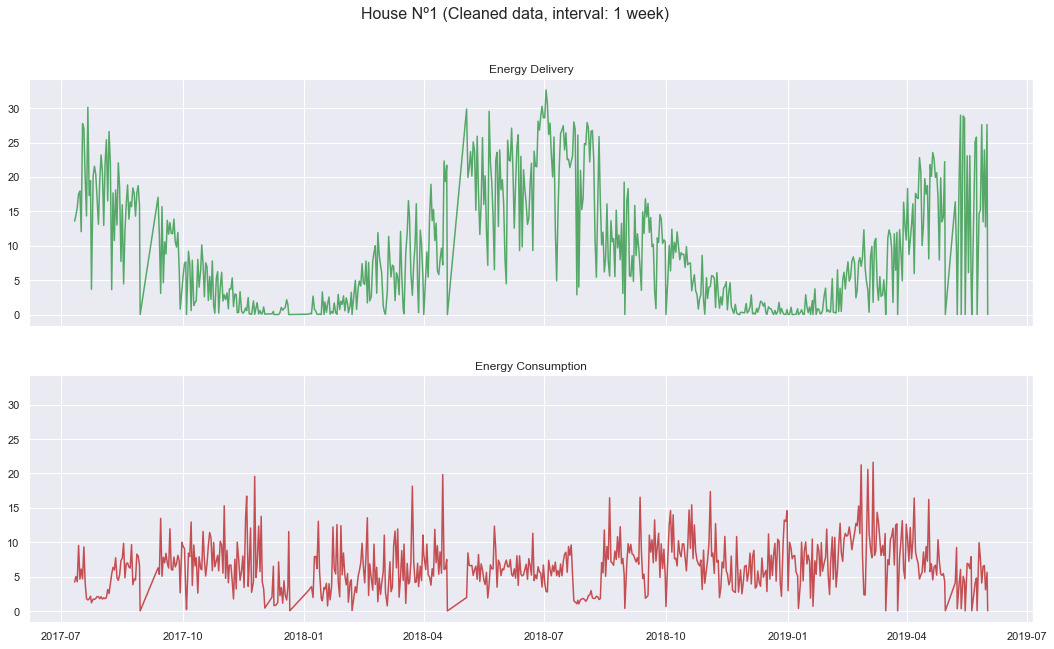

In [10]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(18,10))
axs[0].plot(df_house_1_day['deli'], color='g')
axs[1].plot(df_house_1_day['cons'], color='r')

axs[0].set_title("Energy Delivery")
axs[1].set_title("Energy Consumption")

fig.suptitle('House Nº1 (Cleaned data, interval: 1 week)', fontsize=16)

plt.show()

### Weather Data (_KNMI_)

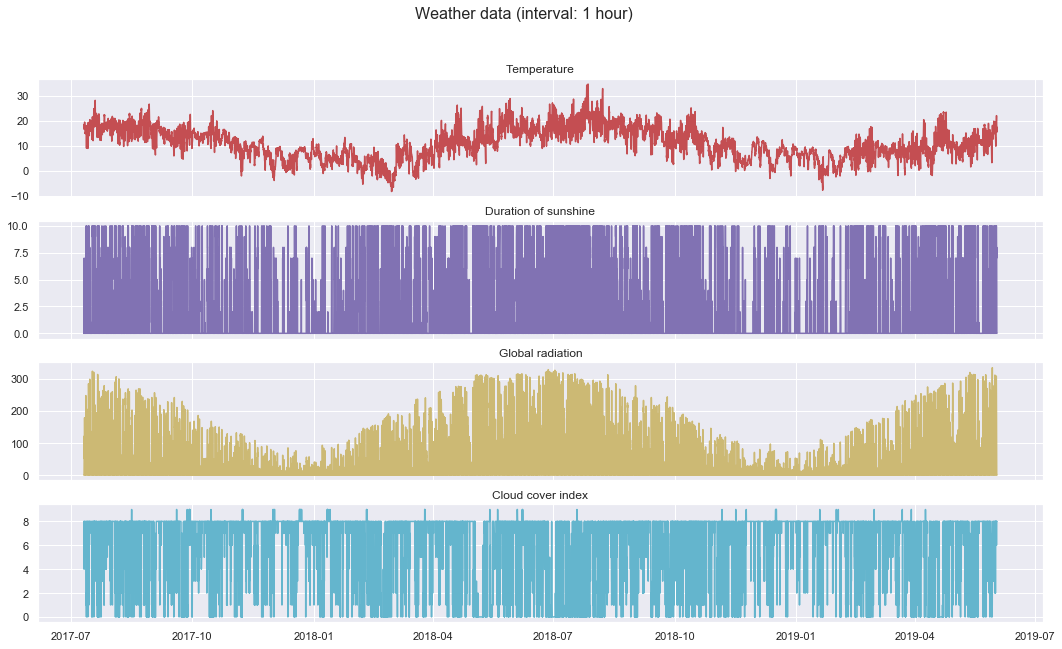

In [13]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(18,10))
axs[0].plot(df_weather['T'], color='r')
axs[1].plot(df_weather['SQ'], color='m')
axs[2].plot(df_weather['Q'], color='y')
axs[3].plot(df_weather['N'], color='c')

axs[0].set_title("Temperature")
axs[1].set_title("Duration of sunshine")
axs[2].set_title("Global radiation")
axs[3].set_title("Cloud cover index")

fig.suptitle('Weather data (interval: 1 hour)', fontsize=16)

plt.show()

## Correlation Matrix (Full dataset)

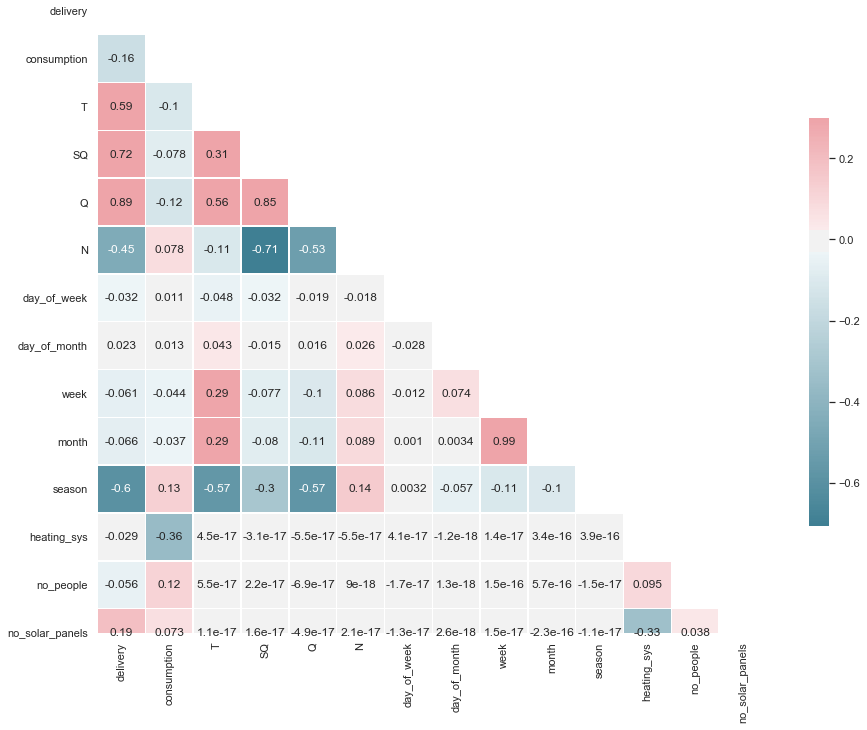

In [15]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_full.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation matrix allow us to see what is the correlation between the variables in our dataset.

We will use it once we create the models in order to contrast the coefficients with their correlation.